In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
input_dir = "/content/drive/MyDrive/input_images"
output_dir = "/content/drive/MyDrive/output_images"

In [3]:
!pip install opencv-python

black_noise:


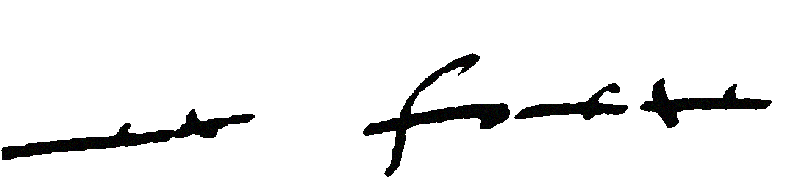



random_rain:


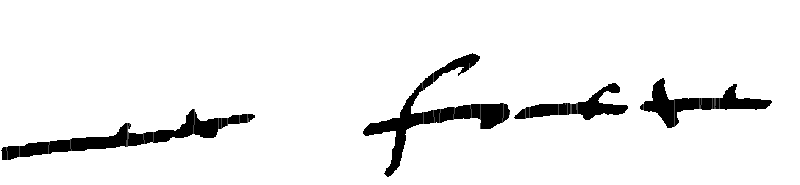



random_shift_scale:


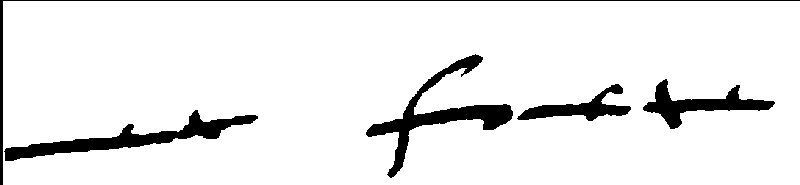



random_pixel_dropout:


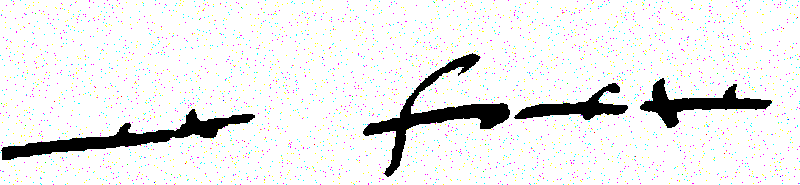



random_blur:


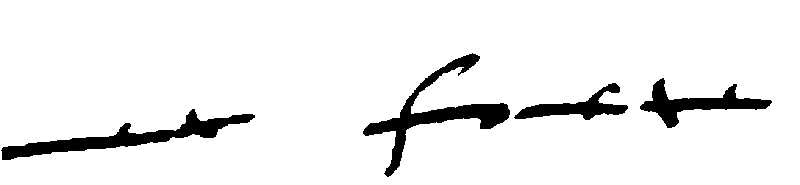

In [5]:


# Import required libraries
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Define functions
def black_noise(image, intensity=0.05):
    noise = np.random.randn(*image.shape) * intensity
    noisy_image = np.clip(image + noise, 0, 1)
    return (noisy_image * 255).astype(np.uint8)

def random_rain(image, num_lines=50, line_thickness=1):
    h, w, _ = image.shape
    overlay = image.copy()

    for _ in range(num_lines):
        start_x = np.random.randint(0, w)
        start_y = np.random.randint(0, h // 2)
        end_x = start_x + np.random.randint(-10, 10)
        end_y = start_y + np.random.randint(h // 2, h)
        cv2.line(overlay, (start_x, start_y), (end_x, end_y), (255, 255, 255), line_thickness)

    return cv2.addWeighted(image, 0.7, overlay, 0.3, 0)

def random_shift_scale(image, max_shift=5, max_scale=1.1):
    h, w, _ = image.shape
    scale = np.random.uniform(1, max_scale)
    shift_x = np.random.randint(-max_shift, max_shift)
    shift_y = np.random.randint(-max_shift, max_shift)

    M = np.float32([[scale, 0, shift_x],
                    [0, scale, shift_y]])
    return cv2.warpAffine(image, M, (w, h))

def random_pixel_dropout(image, dropout_ratio=0.01):
    dropout_mask = np.random.binomial(1, 1 - dropout_ratio, size=image.shape)
    return (image * dropout_mask).astype(np.uint8)

def random_blur(image, max_kernel_size=5):
    kernel_size = np.random.randint(1, max_kernel_size + 1) // 2 * 2 + 1
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

def generate_synthetic_images(input_image, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    transforms = [
        ("black_noise", black_noise),
        ("random_rain", random_rain),
        ("random_shift_scale", random_shift_scale),
        ("random_pixel_dropout", random_pixel_dropout),
        ("random_blur", random_blur),
    ]

    for transform_name, transform in transforms:
        transformed_image = transform(input_image)
        cv2.imwrite(os.path.join(output_dir, f"{transform_name}.png"), transformed_image)
        print(f"{transform_name}:")
        cv2_imshow(transformed_image)
        print("\n")



# Set input and output directory paths
input_image_path = "/content/52_00_r1l49.png" # Replace with your image path
output_dir = "/content"

# Read input image
input_image = cv2.imread(input_image_path)

# Generate and display synthetic images
generate_synthetic_images(input_image, output_dir)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
black_noise:


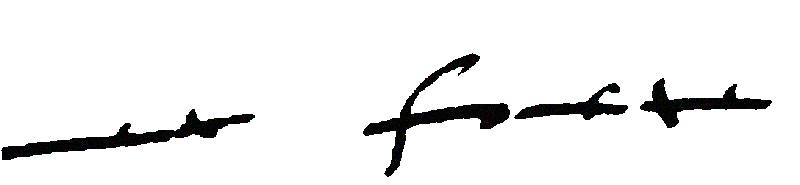



random_rain:


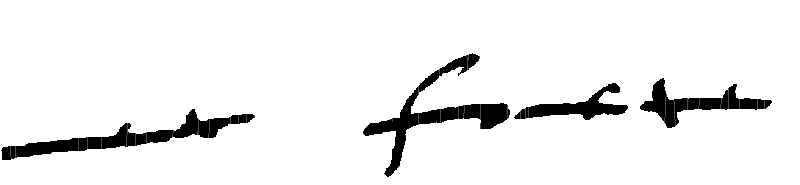



random_shift_scale:


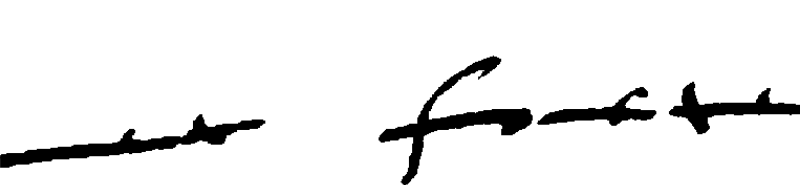



random_pixel_dropout:


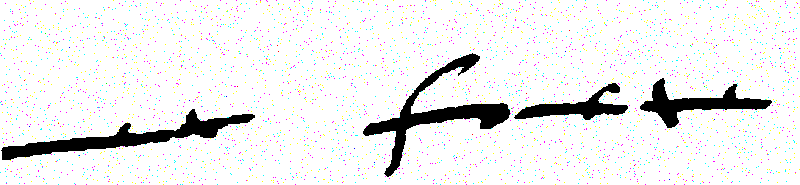



random_blur:


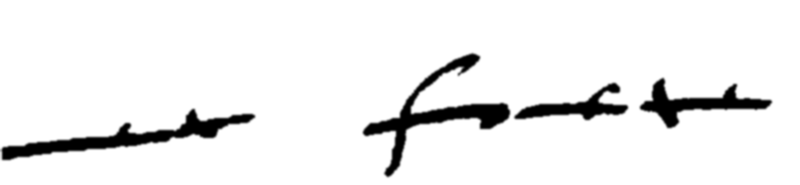



random_rotation:


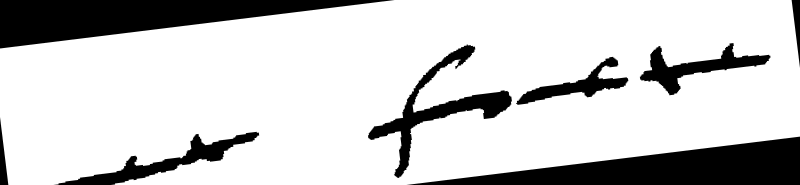



moving_text:


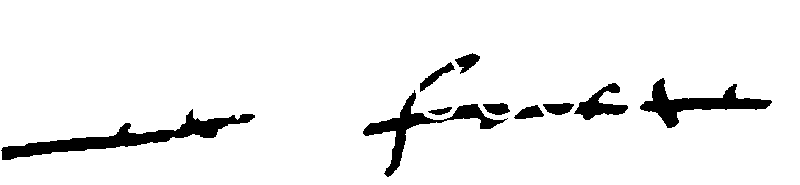

In [8]:
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def random_rotation(image, max_angle=30):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)

    angle = np.random.randint(-max_angle, max_angle)
    scale = 1.0

    M = cv2.getRotationMatrix2D(center, angle, scale)
    return cv2.warpAffine(image, M, (w, h))

def moving_text(image, text="Hello000", font_scale=3, font_thickness=3, max_shift=30):
    (h, w) = image.shape[:2]
    (text_w, text_h), _ = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, font_scale, font_thickness)

    shift_x = np.random.randint(-max_shift, max_shift)
    shift_y = np.random.randint(-max_shift, max_shift)

    x = w // 2 - text_w // 2 + shift_x
    y = h // 2 + text_h // 2 + shift_y

    result = image.copy()
    cv2.putText(result, text, (x, y), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), font_thickness)

    return result

def generate_synthetic_images(input_image, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    transforms = [
        ("black_noise", black_noise),
        ("random_rain", random_rain),
        ("random_shift_scale", random_shift_scale),
        ("random_pixel_dropout", random_pixel_dropout),
        ("random_blur", random_blur),
        ("random_rotation", random_rotation),
        ("moving_text", moving_text),
    ]

    for transform_name, transform in transforms:
        transformed_image = transform(input_image)
        cv2.imwrite(os.path.join(output_dir, f"{transform_name}.png"), transformed_image)
        print(f"{transform_name}:")
        cv2_imshow(transformed_image)
        print("\n")

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Set input and output directory paths
input_image_path = "/content/52_00_r1l49.png" # Replace with your image path
output_dir = "/content"

# Read input image
input_image = cv2.imread(input_image_path)

# Generate and display synthetic images
generate_synthetic_images(input_image, output_dir)